## EXERCICE 6 : PLS

inspire de http://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html


In [1]:
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression


### Partie 1 : regression PLS avec reponse univariee (PLS1)


In [6]:
#On va supposer que l'on veut mettre en lien les notes d'étudiants dans différentes 
#matières (notes) à celles obtenus par les mêmes étudiants à un concours en fin d'année (y)

#GENERATION DE DONNEES SIMULEES
n = 500
p = 7

cov=np.array(
[[0.2 , 0.5  , 0.5 , 0   , 0   , 0.  , 0  ],
[0.5  , 0.2  , 0.5 , 0   , 0   , 0   , 0.],
[0.5  , 0.5  , 0.2  , 0.  , 0   , 0   , 0  ],
[0.   , 0    , 0.  , 1.2 , 0.8 , 0   , 0  ],
[0.   , 0    , 0   , 0.8 , 1.5 , 0   , 0  ],
[0.   , 0    , 0   , 0   , 0   , 0.2  , 0.9],
[0.   , 0.0  , 0   , 0   , 0   , 0.9 , 0.2]]
)

mean = np.array([12,11,13,12,10,9,8.])

notes=np.round(random.multivariate_normal(mean, 4*cov, size=n),1)

notes[notes<0.]=0.
notes[notes>20.]=20.

theta=np.array([0.5,0.00,0.0,0.00,0.00,0.25,0.25])
y = np.round(np.dot(notes,theta.reshape(-1,1)) + np.random.normal(size=n).reshape(-1,1),1)
           
print(notes)
print(y.transpose())
     
    


[[11.9 10.6 13.  ... 12.8  8.4  6.3]
 [14.7  9.9 12.5 ... 16.3 11.   7.6]
 [ 8.9 10.1 10.9 ... 14.6  8.8  9.6]
 ...
 [13.5 12.3 13.5 ... 11.5  7.5  7.2]
 [12.2 12.3 11.9 ... 14.  11.8  9.2]
 [11.8 12.7 11.8 ... 11.3  6.7  8.8]]
[[ 9.8 14.   8.4 11.1  8.5  9.2  8.8 10.1 12.1  8.5  8.1 11.  10.  10.7
  12.1 11.9 13.1 11.2  9.2 10.9 10.6  8.3 10.8 11.2 10.6  9.8 11.7 11.2
  10.7  7.6  9.7 11.8 11.1  9.6 10.3 11.1  8.4  8.6  9.6  7.9  9.1  9.3
  11.   9.5 10.  11.5 10.4  7.9  8.7  7.8  9.8 10.   7.7 10.3  9.8  8.3
  10.3 11.3 11.   9.7  9.2 10.3  7.2 11.8 13.1 11.4 11.2 11.3 10.4 10.8
  10.  10.1 13.6 11.1 10.2 10.2 10.4 11.9 11.  11.9 12.1  9.8 11.4 11.1
  12.7  7.3 10.9 11.6 13.2  8.7 11.6 10.2 12.2 11.  10.8  8.6  9.   9.9
   7.3 11.9 12.5  8.9 10.9 11.1 10.4  9.6 12.2 10.8 10.8 10.3 13.3 11.6
  10.1 12.   9.5 11.7 12.2 13.  12.  11.2 10.6 11.1  9.8 12.2 13.4 11.3
  11.2  9.5 12.8 11.  11.6 14.   9.8 11.   8.9 13.1  9.1 11.7  7.2  8.2
  10.  10.9 10.   9.5 10.4 11.9  9.8  8.3 11.8 11.  

<ipython-input-6-c434bf0eb54a>:20: RuntimeWarning: covariance is not positive-semidefinite.
  notes=np.round(random.multivariate_normal(mean, 4*cov, size=n),1)


##### QUESTION 1: 
- Comment sont construites les donnees simulees ? 
- Que vous attendez-vous a voir dans la PLS


In [7]:

pls1 = PLSRegression(n_components=7)
pls1.fit(notes, y)



PLSRegression(n_components=7)

Les donnees sont principalement construites avec une relation lineaire entre trois variables de X et Y, plus un bruit. Les differentes notes utilisees pour la prédiction sont, pour certaines, correlees entre elles. On distingue notamment trois blocs de notes correlees entre elles, dont deux en lien avec les variables qui expliquent y. 
On s'attend alors a retrouver ces relation dans le 1er vecteur propre du projecteur de X. Il serait logique que le bloc du milieu de ressorte pas, car il n'a pas d'influence sur les y.


##### QUESTION 2 : 
- Quelle est la signification de pls1.x_rotations_. 
- Comment interpretez vous ses valeurs ?


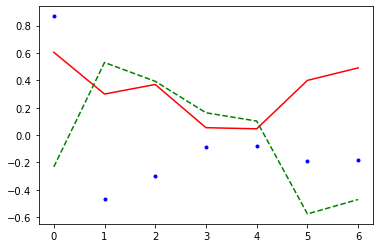

In [8]:

plt.plot(pls1.x_rotations_[:,0],'r-')
plt.plot(pls1.x_rotations_[:,1],'g--')
plt.plot(pls1.x_rotations_[:,2],'b.')
plt.show()


On remarque que  pls1.x_rotations donne l'ensemble des vecteurs de projection de X vers un espace de dimension inferieur avec :
- les vecteurs sont orthonormaux
- Ils maximisent la covariance avec les projections de Y 

Vu que la dimension des observations de sortie y est 1 ici,  pls1.y_rotations_ represente un seul vecteur propre en dimension 1 array([1.]). Nous n'avons en effet pas besoin de projeter Y, vers un sous espace commun (cf pls2) !


A propos des projecteurs :
- pls1.x_rotations_[:,0] mets en evidence les variables de X liées à y, ainsi que les variables corrélées avec ces dernières.
- pls1.x_rotations_[:,1] mets en opposition les deux blocs de variables liés aux valeurs de y.
- pls1.x_rotations_[:,2] ne capture que du bruit.

##### QUESTION 3 : 
- Observez les projections de X sur les deux premiers axes de pls1.x_rotations_ . 
- Pouvez-vous definir des profils etudiants a partir de cette projection de X ?


In [11]:

ProjNotes=np.dot(notes,pls1.x_rotations_[:,[0,1]])


for i in range(10):
    print('Etudiant '+str(i))
    print(' -> notes = ', np.round(notes[i,:],2))
    print(' -> notes projetees = ', np.round(ProjNotes[i,:],2))

    

[[11.9 10.6 13.  ... 12.8  8.4  6.3]
 [14.7  9.9 12.5 ... 16.3 11.   7.6]
 [ 8.9 10.1 10.9 ... 14.6  8.8  9.6]
 ...
 [13.5 12.3 13.5 ... 11.5  7.5  7.2]
 [12.2 12.3 11.9 ... 14.  11.8  9.2]
 [11.8 12.7 11.8 ... 11.3  6.7  8.8]]
[[ 0.605518   -0.23223738]
 [ 0.3001136   0.53066793]
 [ 0.37004835  0.39318985]
 [ 0.05415272  0.16323428]
 [ 0.04607552  0.10266366]
 [ 0.39991233 -0.57599028]
 [ 0.49128268 -0.47061255]]
Etudiant 0
 -> notes =  [11.9 10.6 13.  11.9 12.8  8.4  6.3]
 -> notes projetees =  [22.89  3.43]
Etudiant 1
 -> notes =  [14.7  9.9 12.5 13.  16.3 11.   7.6]
 -> notes projetees =  [26.09  0.64]
Etudiant 2
 -> notes =  [ 8.9 10.1 10.9 14.5 14.6  8.8  9.6]
 -> notes projetees =  [22.15  1.86]
Etudiant 3
 -> notes =  [11.5  9.2  8.5 10.7  6.9  8.9  7.9]
 -> notes projetees =  [21.21 -0.84]
Etudiant 4
 -> notes =  [ 9.5  9.3 12.1 14.9 14.6  6.2  6. ]
 -> notes projetees =  [19.93  5.02]
Etudiant 5
 -> notes =  [ 8.9  9.2 11.5 11.6 10.   8.7  7.2]
 -> notes projetees =  [20.51  